In [1]:
#importing all necessary libraries

from nptdms import TdmsFile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#reading in ex1.tdms file

tdms_file = TdmsFile("ex1.tdms")
tdms_groups = tdms_file.groups()
tdms_Untitled = tdms_file.group_channels("Untitled")
tdms_Untitled

[<TdmsObject with path /'Untitled'/'Accel LW236869 Pump X'>,
 <TdmsObject with path /'Untitled'/'Accel LW236869 Pump Y'>,
 <TdmsObject with path /'Untitled'/'Accel LW236869 Pump Z'>,
 <TdmsObject with path /'Untitled'/'Accel LW236867 Motor X'>,
 <TdmsObject with path /'Untitled'/'Accel LW236867 Motor Y'>,
 <TdmsObject with path /'Untitled'/'Accel LW236867 Motor Z'>,
 <TdmsObject with path /'Untitled'/'Temp0'>,
 <TdmsObject with path /'Untitled'/'Temp1'>,
 <TdmsObject with path /'Untitled'/'Suction Pressure'>,
 <TdmsObject with path /'Untitled'/'Discharge Pressure'>,
 <TdmsObject with path /'Untitled'/'Flow Meter'>]

In [3]:
#Generating data arrays of features

for group in tdms_file.groups():
    Accel_LW236869_Pump_X = tdms_file.object(group, 'Accel LW236869 Pump X').data
    Accel_LW236869_Pump_Y = tdms_file.object(group, 'Accel LW236869 Pump Y').data
    Accel_LW236869_Pump_Z = tdms_file.object(group, 'Accel LW236869 Pump Z').data
    Accel_LW236867_Motor_X = tdms_file.object(group, 'Accel LW236867 Motor X').data
    Accel_LW236867_Motor_Y = tdms_file.object(group, 'Accel LW236867 Motor Y').data
    Accel_LW236867_Motor_Z = tdms_file.object(group, 'Accel LW236867 Motor Z').data
    Temp0 = tdms_file.object(group, 'Temp0').data
    Temp1 = tdms_file.object(group, 'Temp1').data
    Suction_Pressure = tdms_file.object(group, 'Suction Pressure').data
    Discharge_Pressure = tdms_file.object(group, 'Discharge Pressure').data
    Flow_Meter = tdms_file.object(group, 'Flow Meter').data

DataFrame Features with similar number of Data Points and/or with Similar Feature Description

In [4]:
#DataFraming Features with similar number of Data Points

df = pd.DataFrame(np.array([Temp0, Temp1]).T)
df.columns =['Temp0', 'Temp1']
df.head()

,Temp0,Temp1
0,20.306759,20.199844
1,20.441822,20.228363
2,20.287813,20.237894
3,20.461061,20.286718
4,20.597853,20.440273


In [5]:
#DataFraming Features with similar number of Data Points

df1 = pd.DataFrame(np.array([Flow_Meter, Suction_Pressure, Discharge_Pressure]).T)
df1.columns =['Flow_Meter', 'Suction_Pressure', 'Discharge_Pressure']
df1.head()

,Flow_Meter,Suction_Pressure,Discharge_Pressure
0,-0.181501,7.804402,7.187913
1,-0.180593,7.851201,7.006305
2,-0.162705,7.874671,7.153827
3,-0.155985,7.860910,7.096201
4,-0.170332,7.838279,7.107377


In [6]:
#DataFraming Features with similar Feature Description & number of Data Points

df2 = pd.DataFrame(np.array([Accel_LW236869_Pump_X, Accel_LW236869_Pump_Y, Accel_LW236869_Pump_Z]).T)
df2.columns =['Accel_LW236869_Pump_X', 'Accel_LW236869_Pump_Y', 'Accel_LW236869_Pump_Z']
df2.head()

,Accel_LW236869_Pump_X,Accel_LW236869_Pump_Y,Accel_LW236869_Pump_Z
0,3.508210,4.996766,0.145932
1,3.483380,4.233002,-0.087518
2,3.646552,4.609184,-0.221852
3,3.611080,4.829574,0.419186
4,3.572060,4.992966,0.018492


In [7]:
#DataFraming Features with similar Feature Description & number of Data Points although Accel_LW236867_Motor_Y has lesser 
#Data Points

Accel_LW236867_Motor_X = pd.DataFrame(Accel_LW236867_Motor_X)
Accel_LW236867_Motor_Y = pd.DataFrame(Accel_LW236867_Motor_Y) 
Accel_LW236867_Motor_Z = pd.DataFrame(Accel_LW236867_Motor_Z)
df3 = pd.concat([Accel_LW236867_Motor_X, Accel_LW236867_Motor_Y, Accel_LW236867_Motor_Z], axis = 1)
df3.columns = ['Accel_LW236867_Motor_X', 'Accel_LW236867_Motor_Y', 'Accel_LW236867_Motor_Z']
df3.head()

,Accel_LW236867_Motor_X,Accel_LW236867_Motor_Y,Accel_LW236867_Motor_Z
0,3.977152,5.893423,3.476469
1,3.495818,5.831693,3.981350
2,3.499332,5.279752,3.750547
3,3.945532,6.572456,4.367224
4,4.072013,6.031408,4.204940


Plotting the Time Series of the Features in each DataFrame using the Index as the Time Variable

In [8]:
df.reset_index(level=0, inplace=True)

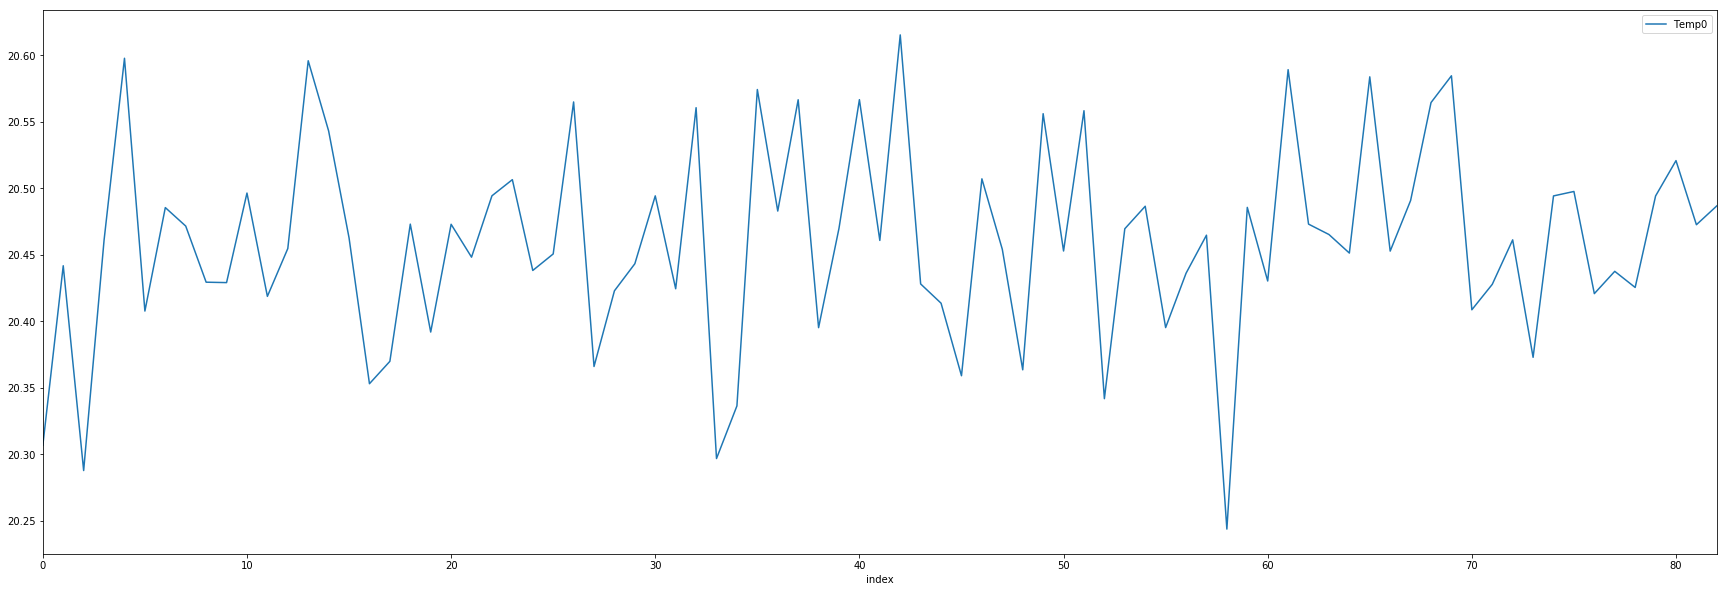

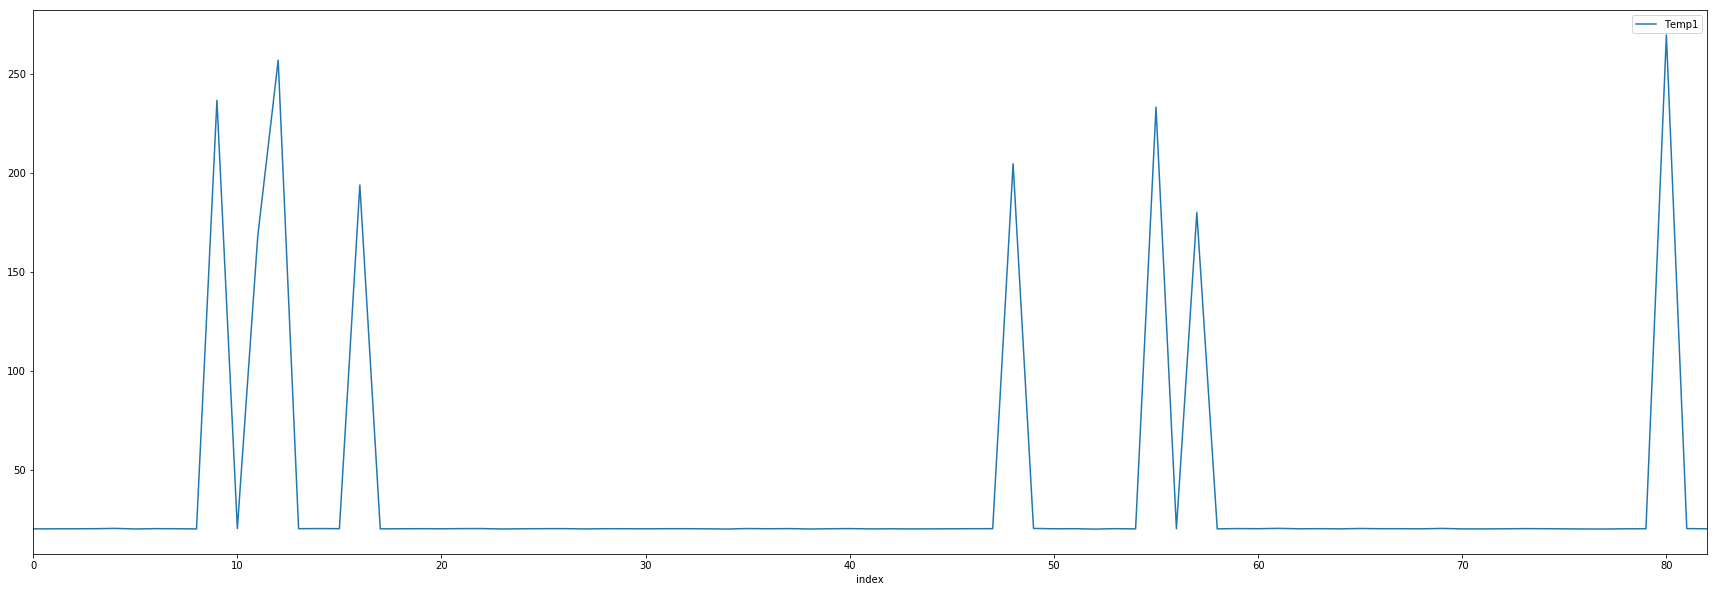

In [9]:
df.plot(x= 'index', y = 'Temp0',figsize=(30,10))
df.plot(x= 'index', y = 'Temp1',figsize=(30,10))

In [10]:
df1.reset_index(level=0, inplace=True)

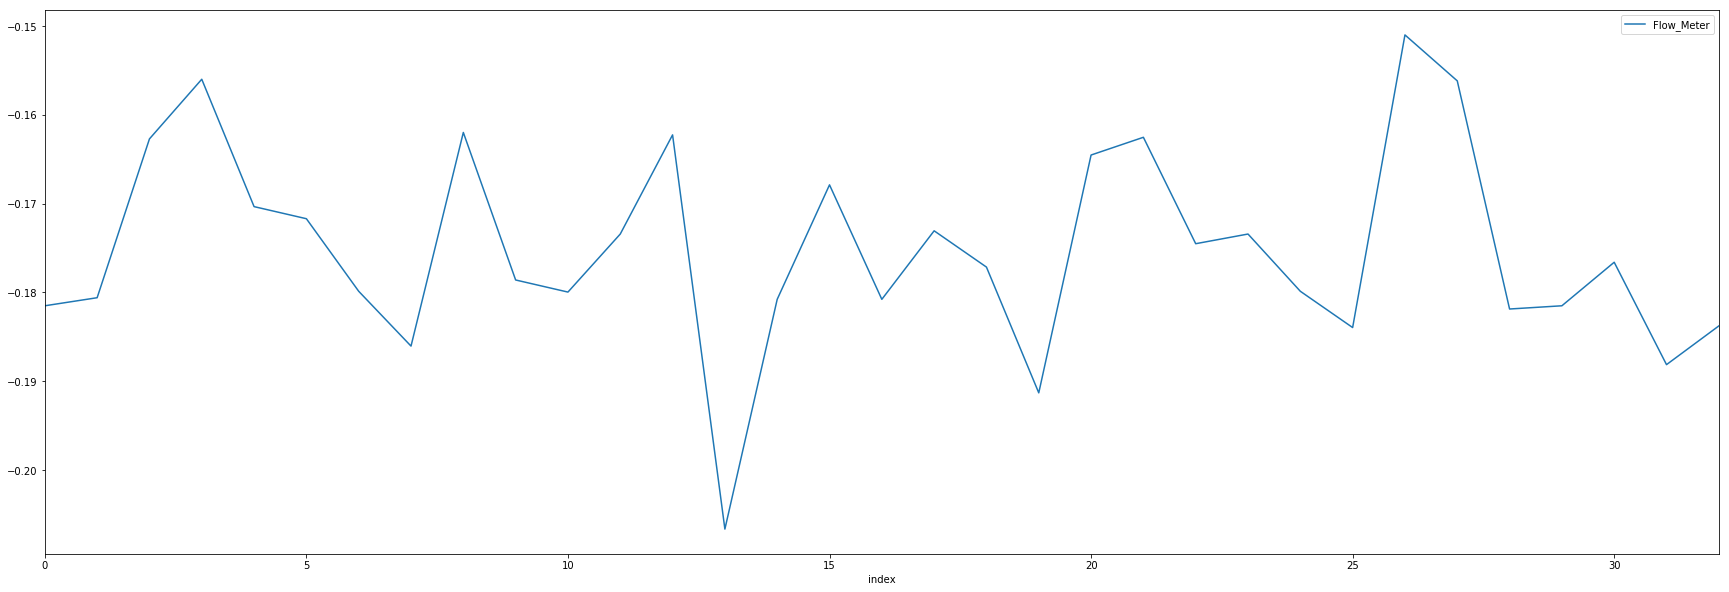

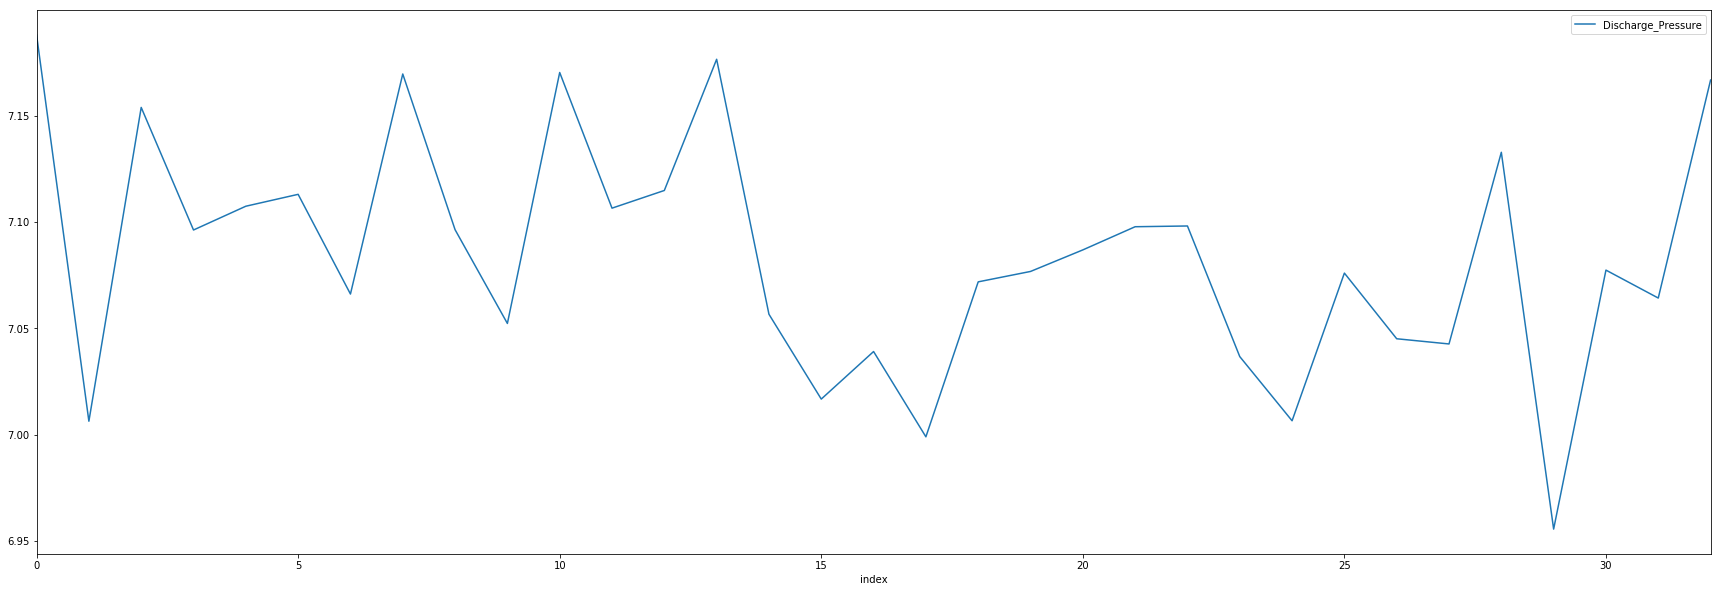

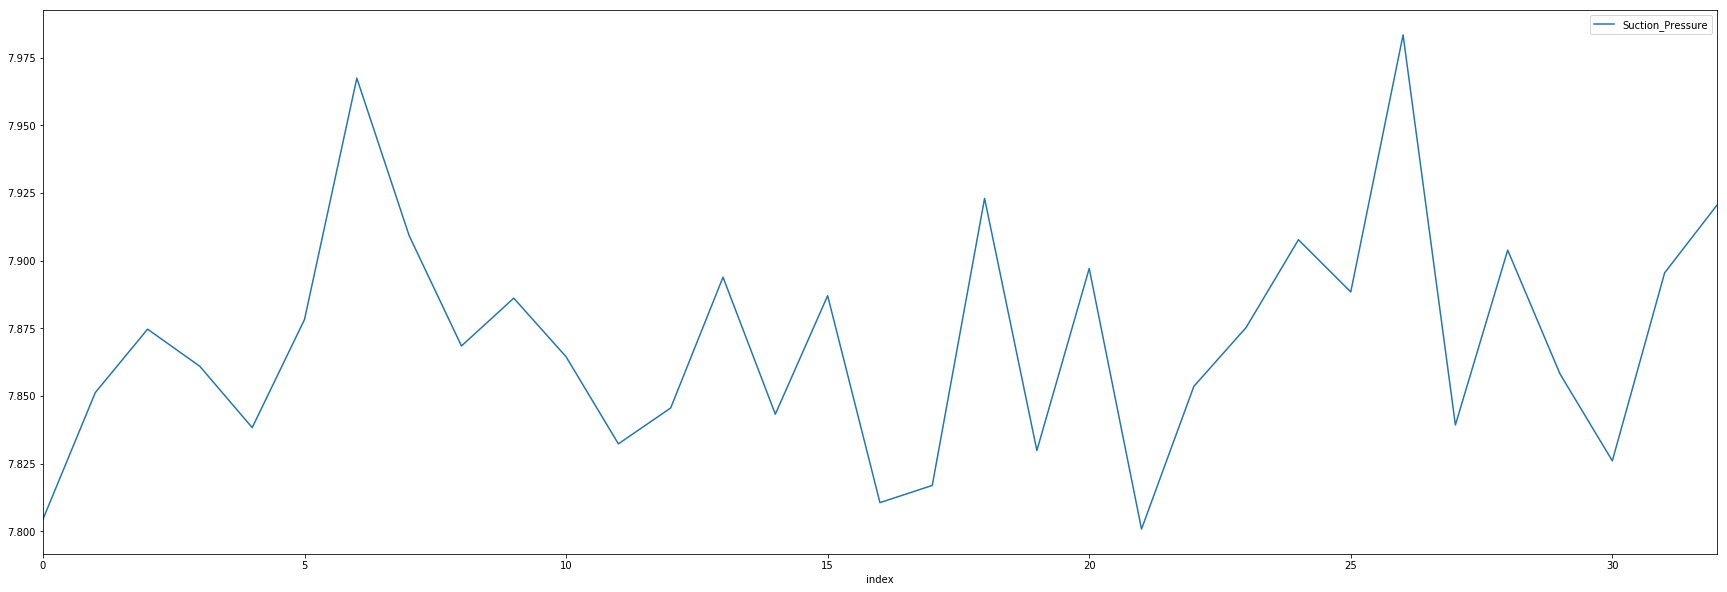

In [11]:
df1.plot(x= 'index', y = 'Flow_Meter',figsize=(30,10))
df1.plot(x= 'index', y = 'Discharge_Pressure',figsize=(30,10))
df1.plot(x= 'index', y = 'Suction_Pressure',figsize=(30,10))

In [12]:
df2.reset_index(level=0, inplace=True)

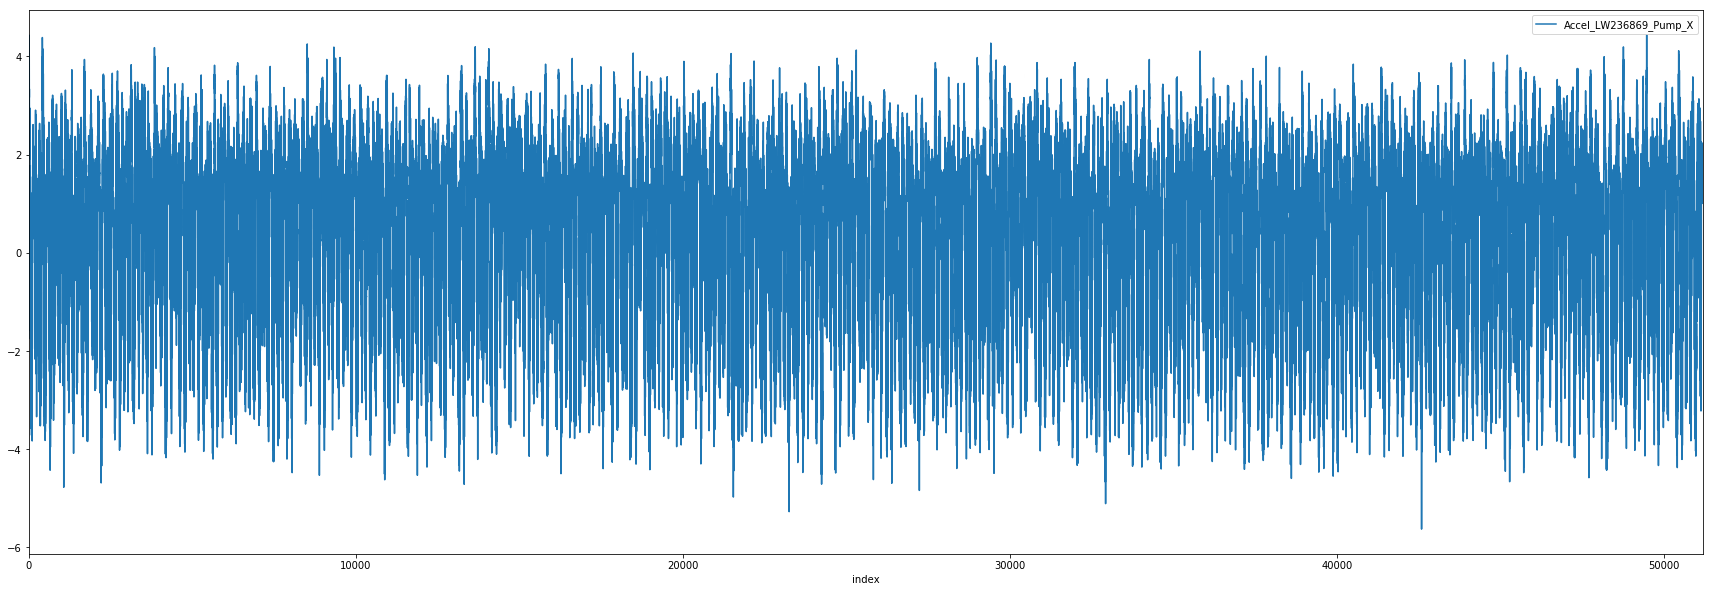

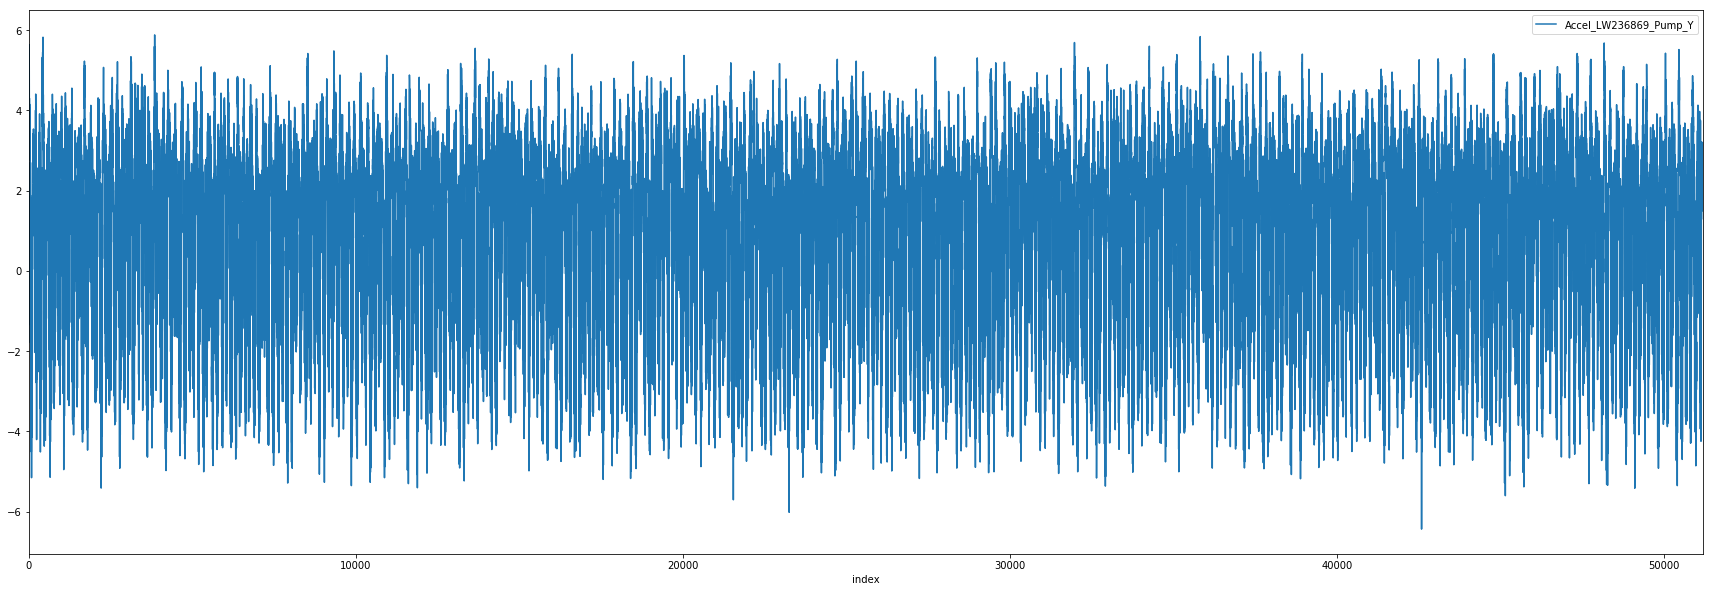

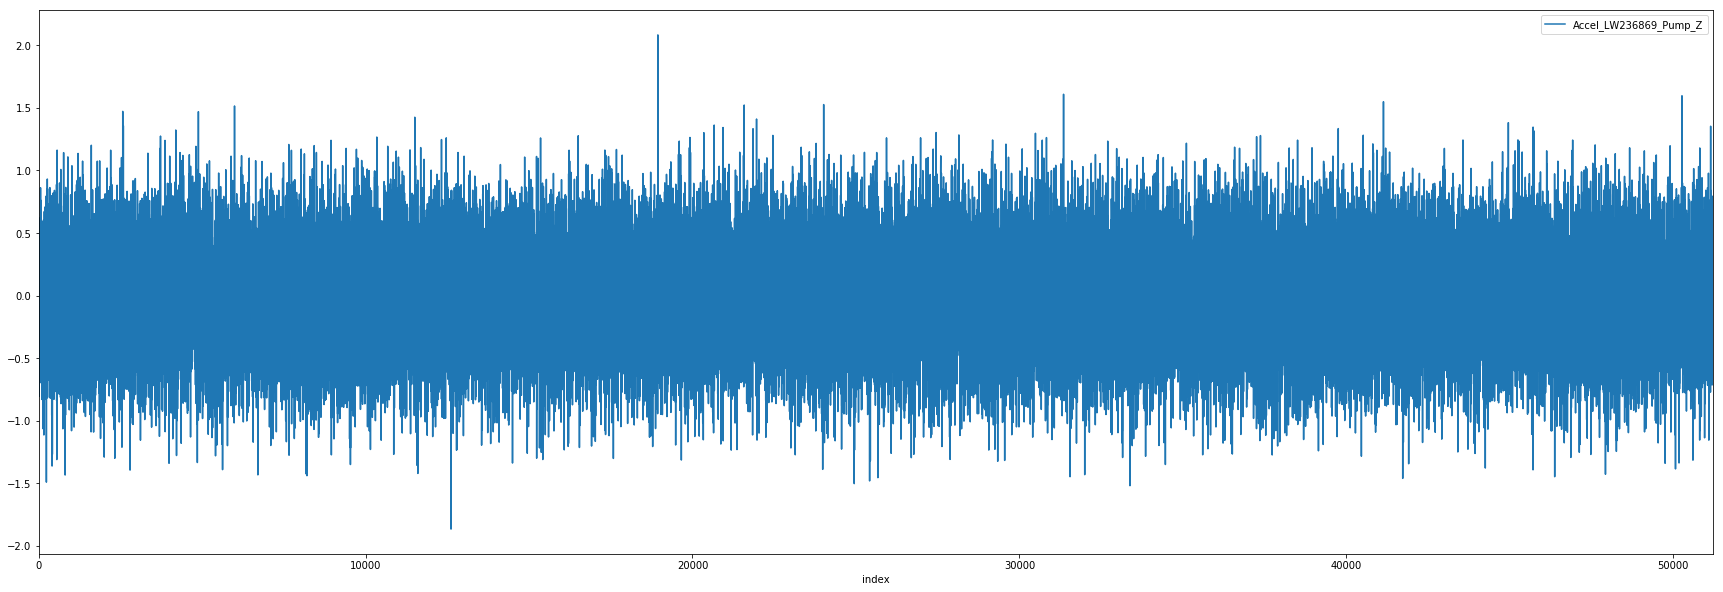

In [13]:
df2.plot(x= 'index', y = 'Accel_LW236869_Pump_X',figsize=(30,10))
df2.plot(x= 'index', y = 'Accel_LW236869_Pump_Y',figsize=(30,10))
df2.plot(x= 'index', y = 'Accel_LW236869_Pump_Z',figsize=(30,10))

In [14]:
df3.reset_index(level=0, inplace=True)

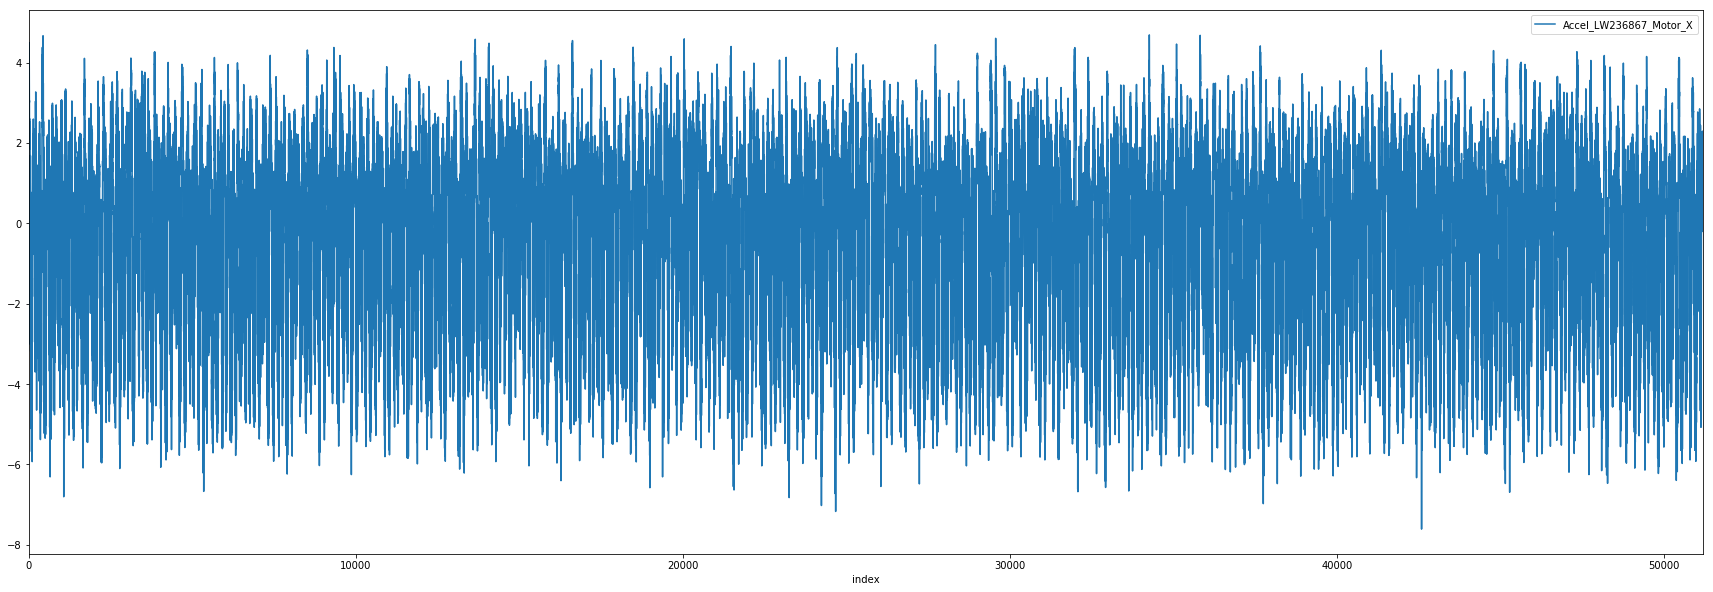

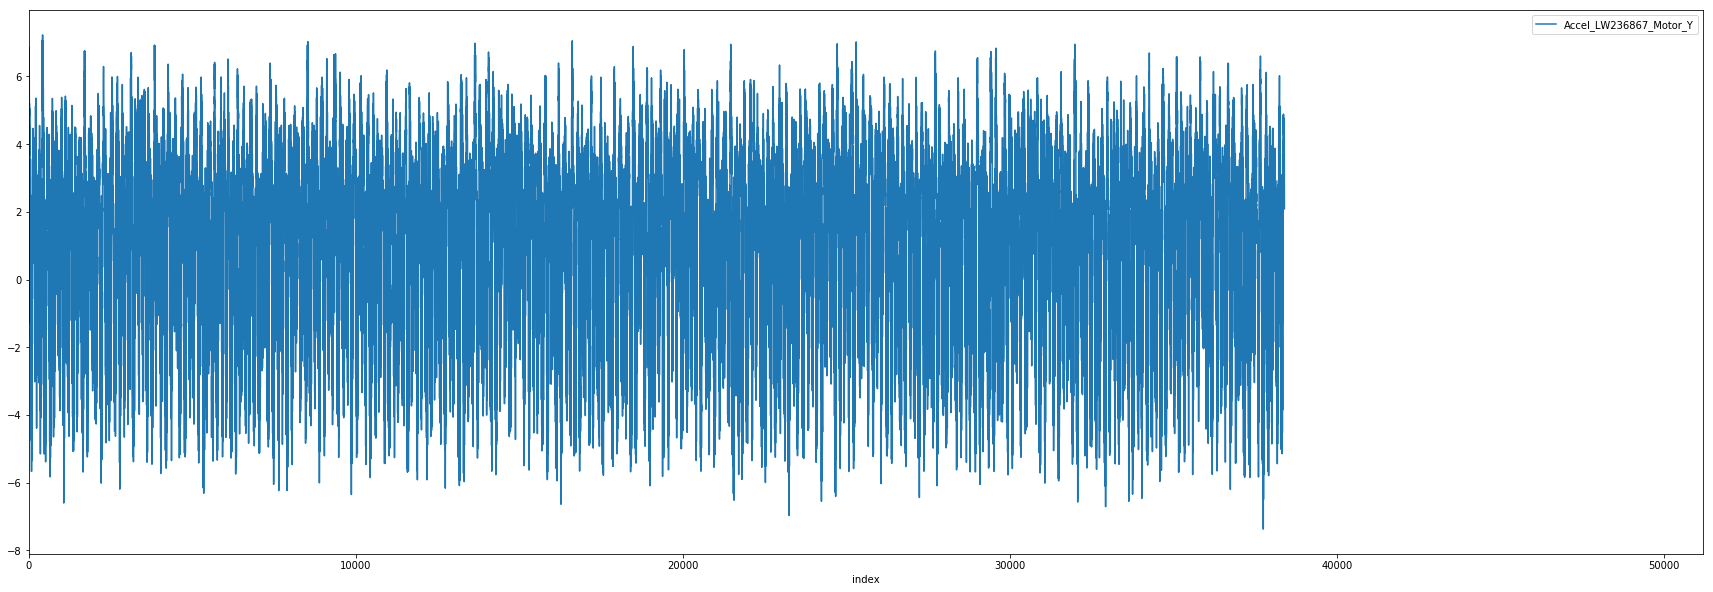

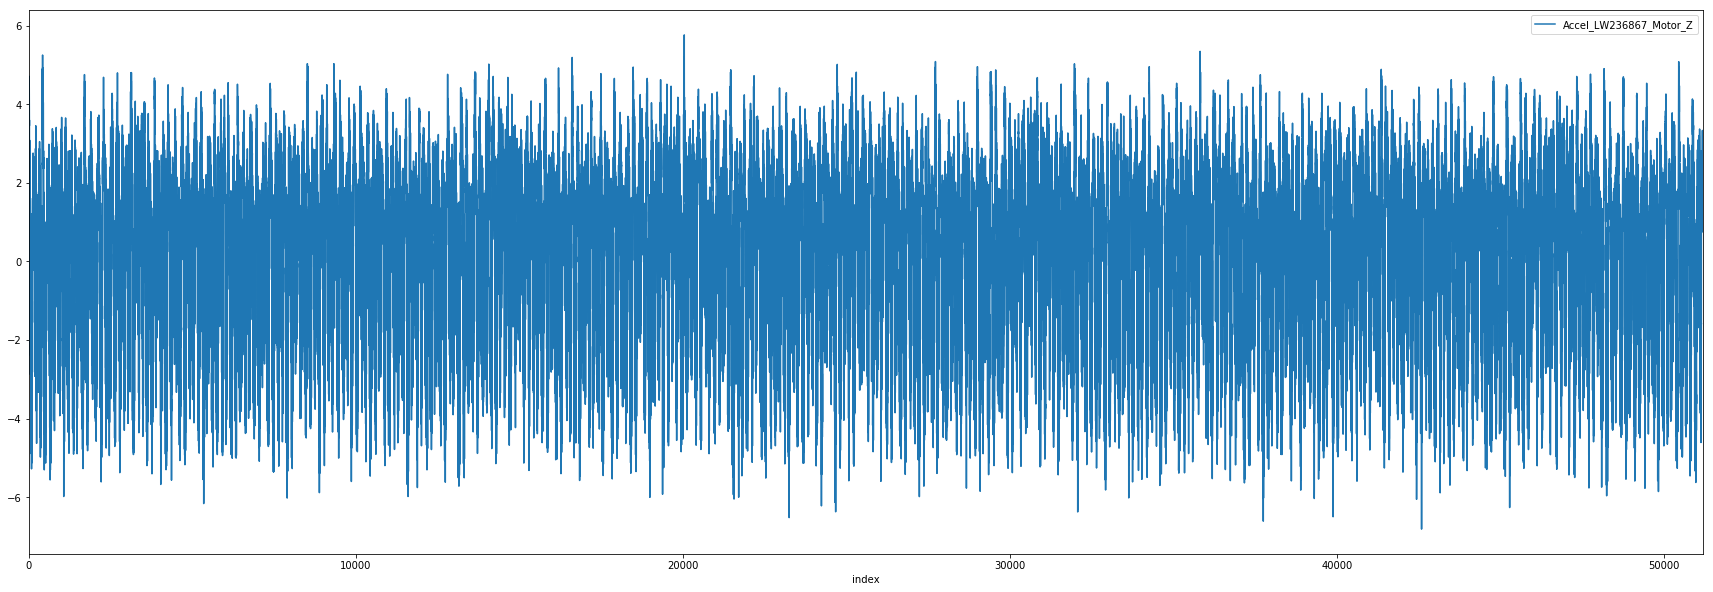

In [15]:
df3.plot(x= 'index', y = 'Accel_LW236867_Motor_X',figsize=(30,10))
df3.plot(x= 'index', y = 'Accel_LW236867_Motor_Y',figsize=(30,10))
df3.plot(x= 'index', y = 'Accel_LW236867_Motor_Z',figsize=(30,10))

Time Series Anomaly Detection using Moving Average

In [16]:
#Importing & Initialising the necessary functions required to utilize Moving Average as an Anomaly Detector
#Importing Mean Absolute Error, Initialising Moving Average function & Moving Average Plotting Function including intervals
#& anomalies

from sklearn.metrics import mean_absolute_error

def moving_average(series, n):
    return np.average(series[-n:])

def plotMovingAverage(series, window, plot_intervals=False, scale = 1.96, plot_anomalies=False):
    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values

    if plot_intervals:
        
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, "r--", label="Upper Bound / Lower Bound")
        plt.plot(lower_bound, "r--")

        # Having the intervals, find abnormal values

        if plot_anomalies:

            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bound] = series[series<lower_bound]
            anomalies[series>upper_bound] = series[series>upper_bound]
            plt.plot(anomalies, "ro", markersize=10)
            print(anomalies.dropna())

    plt.plot(series, label="Actual values")
    plt.legend(loc="upper center")
    plt.grid(True)

Utilising the Temp1 Time Series as a case sample for Anomaly Detection using Moving Average

In [17]:
Temp1 = pd.DataFrame(df['Temp1'])

In [18]:
#Calculating the Moving Average of the Time Series with Window Size of 5 secs. Temp1 has 83 Data Points

moving_average(Temp1, 5)

70.152604379199431

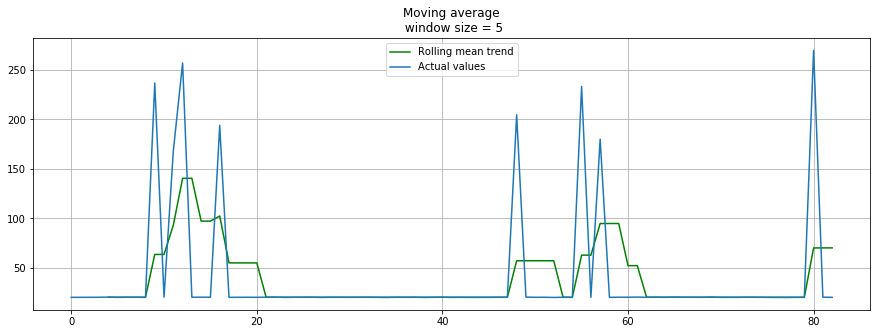

In [19]:
#Plotting out the Rolling Mean Trend with a Window Size of 5 seconds

plotMovingAverage(Temp1, 5)

      Temp1
9   236.661
48  204.595
55  233.198
80  269.673


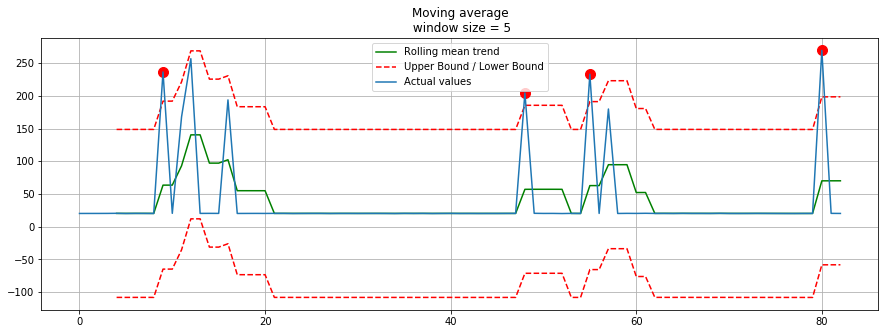

In [20]:
#Anomaly Detection of Temp1 Time Series by the Upper & Lower Bounds of the Rolling Mean Trend with a Window size of 5 seconds

plotMovingAverage(Temp1, 5, plot_intervals=True, plot_anomalies=True)

Utilising the Accel_LW236867_Motor_Y Time Series as a case sample for Anomaly Detection using Moving Average

In [21]:
Accel_LW236867_Motor_Y = pd.DataFrame(df3['Accel_LW236867_Motor_Y'])

In [22]:
#Removing Null Values

Accel_LW236867_Motor_Y = Accel_LW236867_Motor_Y.dropna()

In [23]:
#Calculating the Moving Average of the Time Series with Window Size of 3600 secs (1 hour). Accel_LW236867_Motor_Y has 38400 
#Data Points

moving_average(Accel_LW236867_Motor_Y, 3600)

1.2511661903765636

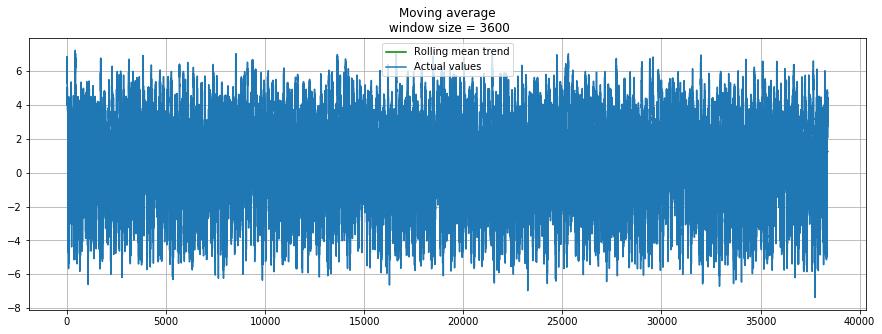

In [24]:
#Plotting out the Rolling Mean Trend with a Window Size of 3600 seconds

plotMovingAverage(Accel_LW236867_Motor_Y, 3600)

      Accel_LW236867_Motor_Y
5345                -6.31101
9861                -6.35095
16273               -6.63782
21544                -6.3219
21565               -6.51799
23251               -6.97189
24238               -6.54704
27233                -6.4381
32076               -6.57246
32083               -6.44536
32929               -6.71044
33637               -6.55067
37752               -7.37132
37758                -6.4962


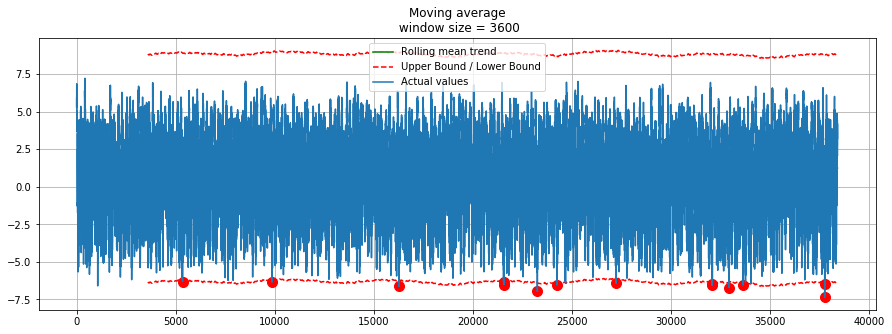

In [25]:
#Anomaly Detection of Accel_LW236867_Motor_Y Time Series by the Upper & Lower Bounds of the Rolling Mean Trend with a Window 
#size of 3600 seconds

plotMovingAverage(Accel_LW236867_Motor_Y, 3600 , plot_intervals=True, plot_anomalies=True)

Utilising the Flow_Meter Time Series as a case sample for Anomaly Detection using Moving Average

In [26]:
Flow_Meter = pd.DataFrame(df1['Flow_Meter'])

In [27]:
#Calculating the Moving Average of the Time Series with Window Size of 2 secs. Flow_Meter has 33 Data Points

moving_average(Flow_Meter, 2)

-0.18595051020383835

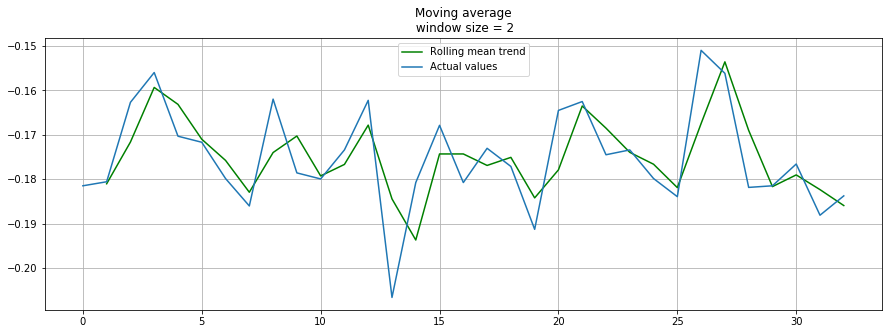

In [28]:
#Plotting out the Rolling Mean Trend with a Window Size of 2 seconds

plotMovingAverage(Flow_Meter, 2)

   Flow_Meter
13  -0.206654


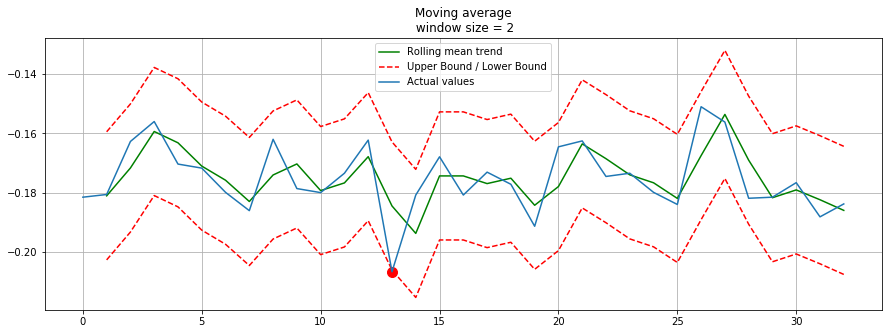

In [29]:
#Anomaly Detection of Flow_Meter Time Series by the Upper & Lower Bounds of the Rolling Mean Trend with a Window size of 
#2 seconds

plotMovingAverage(Flow_Meter, 2 , plot_intervals=True, plot_anomalies=True)